https://www.kaggle.com/code/meenaaa/cancer-death-rate-xgboost/notebook

https://www.researchgate.net/publication/341042405_On_linear_regression_models_with_hierarchical_categorical_variables

In [1]:
# data wrangling tools
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# statistical analysis
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# scikit-learn
from sklearn.model_selection import train_test_split

import time

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
trainset = pd.read_csv("G:/My Drive/DataMining/POC/LungCancer/Dataset/Raw/trainset.csv", index_col = 0)
trainset.head(5)

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,City,State,Region,Division,TARGET_deathRate
Geography,,,,,,,,,,,,,,,,,,,,,
"Greene County, North Carolina",105.0,43.000,440.800000,37263,21134.000,28.3,0.000000,0,39.00,37.0,...,24.785427,0.150038,5.051674,43.921351,8.353222,603,33,2,6,183.2
"McHenry County, Illinois",1192.5,329.875,474.400000,72741,153227.875,6.9,0.000000,8,39.30,38.2,...,1.345992,2.633745,2.641228,61.798687,4.286142,948,13,0,0,181.4
"Wichita County, Kansas",1192.5,6.000,453.549422,53447,2157.000,11.5,0.000000,6,35.70,34.5,...,0.000000,0.317604,2.903811,57.490397,7.061503,1614,16,0,7,177.6
"Mineral County, Montana",35.0,12.000,538.800000,36449,4251.000,17.3,0.000000,0,53.55,51.9,...,0.070788,0.165172,0.141576,46.769034,3.333333,984,26,3,3,188.8
"Ohio County, West Virginia",308.0,123.000,500.900000,40195,43066.000,18.4,209.768024,1,43.30,41.3,...,4.152439,0.850196,0.288746,42.926988,3.257227,1085,48,2,6,184.4


In [4]:
valset = pd.read_csv("G:/My Drive/DataMining/POC/LungCancer/Dataset/Raw/valset.csv", index_col = 0)
valset.head(5)

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate,City,State,Region,Division
Geography,,,,,,,,,,,,,,,,,,,,,
"Linn County, Oregon",675.0,273,477.4,44358,120547.0,19.1,8.295520,3,39.50,38.8,...,0.437922,1.223828,1.237276,51.807095,4.659173,186.5,139,32,3,5
"Champaign County, Illinois",781.0,267,450.2,47966,169831.5,22.6,201.766857,4,29.30,28.2,...,12.588086,2.628022,0.978296,39.728702,3.467191,152.5,40,8,0,0
"Saratoga County, New York",1113.5,354,508.7,71885,169831.5,7.2,26.519454,8,41.80,40.9,...,1.611447,2.372930,0.393254,52.770765,4.520914,174.2,228,27,1,2
"Montmorency County, Michigan",88.0,37,484.4,37961,9259.0,15.7,0.000000,1,52.35,50.7,...,0.361664,0.000000,0.340389,49.213759,3.263086,207.6,172,17,0,0
"Barrow County, Georgia",281.0,114,457.7,49698,75370.0,13.0,0.000000,5,34.80,32.9,...,11.578626,2.628022,1.976060,55.195246,5.318187,192.0,8,6,2,6


In [5]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2467 entries, Greene County, North Carolina to Van Wert County, Ohio
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              2467 non-null   float64
 1   avgDeathsPerYear         2467 non-null   float64
 2   incidenceRate            2467 non-null   float64
 3   medIncome                2467 non-null   int64  
 4   popEst2015               2467 non-null   float64
 5   povertyPercent           2467 non-null   float64
 6   studyPerCap              2467 non-null   float64
 7   binnedInc                2467 non-null   int64  
 8   MedianAge                2467 non-null   float64
 9   MedianAgeMale            2467 non-null   float64
 10  MedianAgeFemale          2467 non-null   float64
 11  AvgHouseholdSize         2467 non-null   float64
 12  PercentMarried           2467 non-null   float64
 13  PctNoHS18_24             2467 non-null

In [6]:
valset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305 entries, Linn County, Oregon to Macon County, Missouri
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              305 non-null    float64
 1   avgDeathsPerYear         305 non-null    int64  
 2   incidenceRate            305 non-null    float64
 3   medIncome                305 non-null    int64  
 4   popEst2015               305 non-null    float64
 5   povertyPercent           305 non-null    float64
 6   studyPerCap              305 non-null    float64
 7   binnedInc                305 non-null    int64  
 8   MedianAge                305 non-null    float64
 9   MedianAgeMale            305 non-null    float64
 10  MedianAgeFemale          305 non-null    float64
 11  AvgHouseholdSize         305 non-null    float64
 12  PercentMarried           305 non-null    float64
 13  PctNoHS18_24             305 non-null    float64

In [7]:
X_train = trainset.drop(['TARGET_deathRate'], axis = 1)
y_train = trainset['TARGET_deathRate']

In [8]:
X_val = valset.drop(['TARGET_deathRate'], axis = 1)
y_val = valset['TARGET_deathRate']

In [9]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(2467, 36) (2467,)
(305, 36) (305,)


# Measure

In [10]:
#evaluation metrics for regression model
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error, r2_score

In [11]:
def deviation_function(y_val, pred):
  deviation = []
  for i in range(0, len(y_val)):
    deviation.append(abs(pred[i] - y_val[i]) / y_val[i])
  return np.array(deviation).mean()

# Linear Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [12]:
#linear regression model
from sklearn.linear_model import LinearRegression          

In [13]:
lr = LinearRegression()

In [14]:
#training the model
lr_model = lr.fit(X_train,y_train) 
lr_pred = lr_model.predict(X_val)

## Evaluate

In [15]:
#evaluating the model with the following metrics
#mean squared error
lr_mse=mean_squared_error(lr_pred, y_val)     
#mean absolute error     
lr_mae=mean_absolute_error(lr_pred, y_val)  
#root mean squared error      
lr_rmse=np.sqrt(mean_squared_error(lr_pred, y_val))
#r2 score
lr_r2 = r2_score(lr_pred, y_val)
print(f'mse: {lr_mse}')
print(f'mae: {lr_mae}')
print(f'rmse: {lr_rmse}')
print(f"R-Squared: {lr_r2}")

mse: 321.95840865572393
mae: 13.794004082707051
rmse: 17.943199510001662
R-Squared: 0.3680029193818981


In [16]:
lr_df =pd.DataFrame({"mse": lr_mse,"mae": lr_mae,"rmse": lr_rmse, "r2": lr_r2, "deviation": deviation_function(y_val, lr_pred)},index=['Linear Regression'])

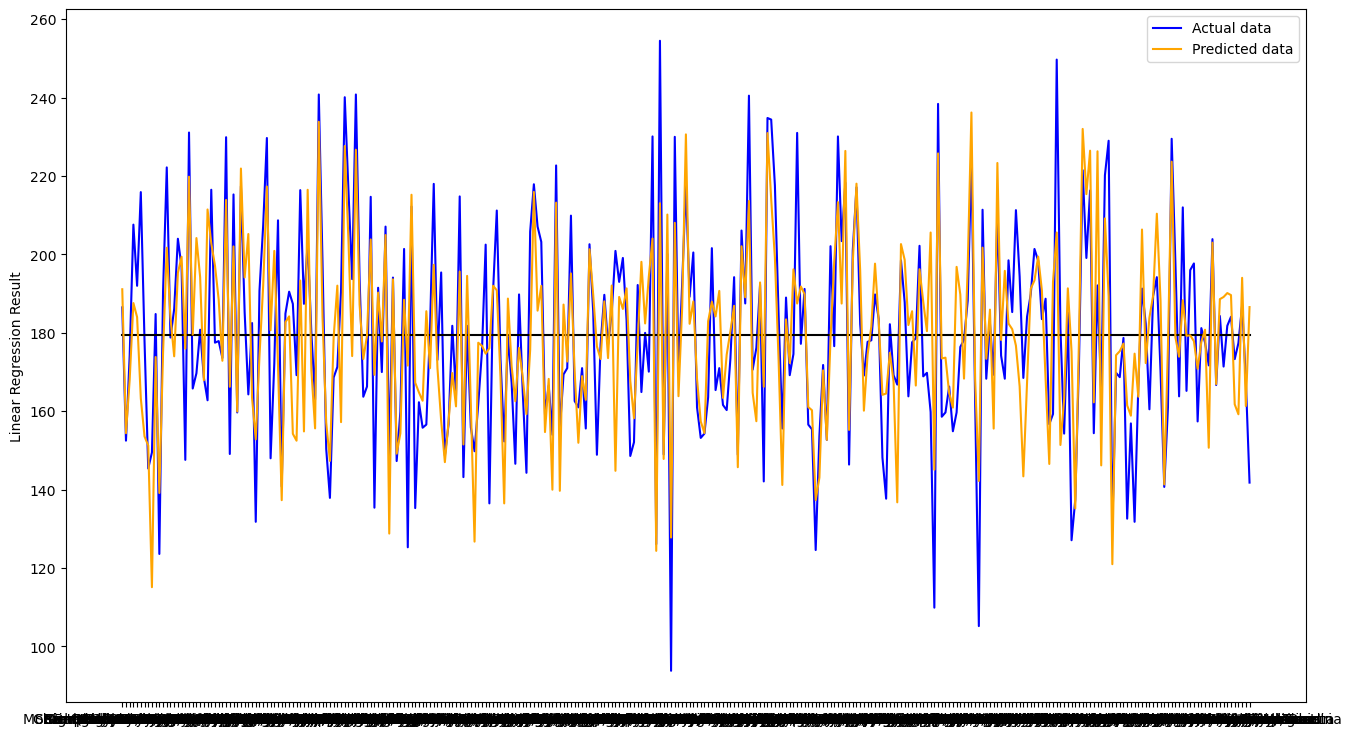

In [17]:
Axis = [y_val.mean()] * len(y_val)
plt.figure(figsize=(16, 9))
plt.ylabel('Linear Regression Result')
plt.plot(y_val, 'blue', label='Actual data')
plt.plot(Axis, color="black")
plt.plot(lr_pred, 'orange', label='Predicted data')
plt.legend()

# Support Vector Regression

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [18]:
#support vector regression model
from sklearn.svm import SVR

In [19]:
svr = SVR()

In [20]:
#training the model
svr_model = svr.fit(X_train,y_train) 
svr_pred = svr_model.predict(X_val)

## Evaluate

In [21]:
#evaluating the model with the following metrics
#mean squared error
svr_mse=mean_squared_error(svr_pred, y_val)     
#mean absolute error     
svr_mae=mean_absolute_error(svr_pred, y_val)  
#root mean squared error      
svr_rmse=np.sqrt(mean_squared_error(svr_pred, y_val))
#r2 score
svr_r2 = r2_score(svr_pred, y_val)
print(f'mse: {svr_mse}')
print(f'mae: {svr_mae}')
print(f'rmse: {svr_rmse}')
print(f"R-Squared: {svr_r2}")

mse: 552.5880212253593
mae: 18.503919036071345
rmse: 23.50719084079081
R-Squared: -6.002882556937757


In [22]:
svr_df =pd.DataFrame({"mse": svr_mse,"mae": svr_mae,"rmse": svr_rmse, "r2": svr_r2, "deviation": deviation_function(y_val, svr_pred)},index=['Support Vector Regression'])

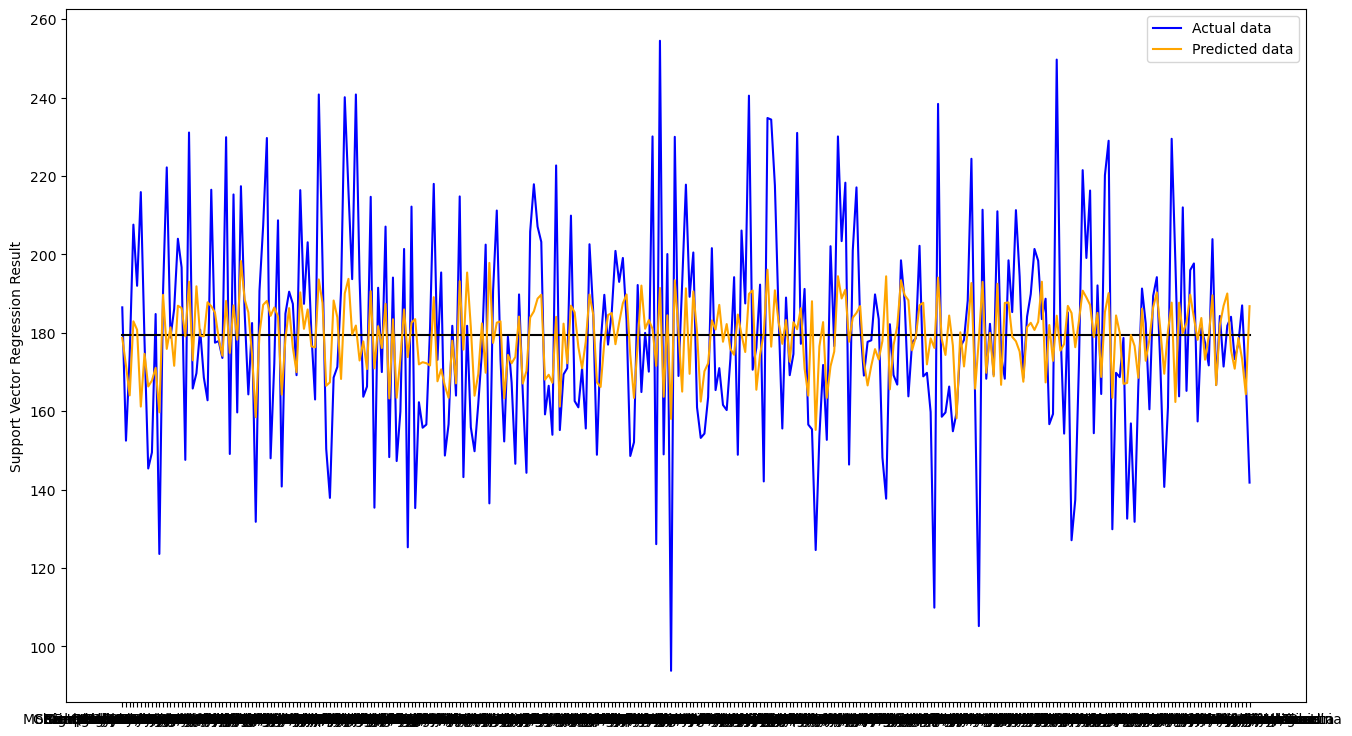

In [23]:
Axis = [y_val.mean()] * len(y_val)
plt.figure(figsize=(16, 9))
plt.ylabel('Support Vector Regression Result')
plt.plot(y_val, 'blue', label='Actual data')
plt.plot(Axis, color="black")
plt.plot(svr_pred, 'orange', label='Predicted data')
plt.legend()

# Decision Tree Regression

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [24]:
# decision tree regression model
from sklearn.tree import DecisionTreeRegressor             

In [25]:
dtr = DecisionTreeRegressor()

In [26]:
#training the model
dtr_model = dtr.fit(X_train,y_train) 
dtr_pred = dtr_model.predict(X_val)

## Evaluate

In [27]:
#evaluating the model with the following metrics
#mean squared error
dtr_mse=mean_squared_error(dtr_pred, y_val)     
#mean absolute error     
dtr_mae=mean_absolute_error(dtr_pred, y_val)  
#root mean squared error      
dtr_rmse=np.sqrt(mean_squared_error(dtr_pred, y_val))
#r2 score
dtr_r2 = r2_score(dtr_pred, y_val)
print(f'mse: {dtr_mse}')
print(f'mae: {dtr_mae}')
print(f'rmse: {dtr_rmse}')
print(f"r2_score: {dtr_r2}")

mse: 780.8927540983606
mae: 20.890819672131148
rmse: 27.94445837904826
r2_score: 0.009852192221414313


In [28]:
dtr_df =pd.DataFrame({"mse": dtr_mse,"mae": dtr_mae,"rmse": dtr_rmse, "r2": dtr_r2, "deviation": deviation_function(y_val, dtr_pred)},index=['Decision Tree Regression'])

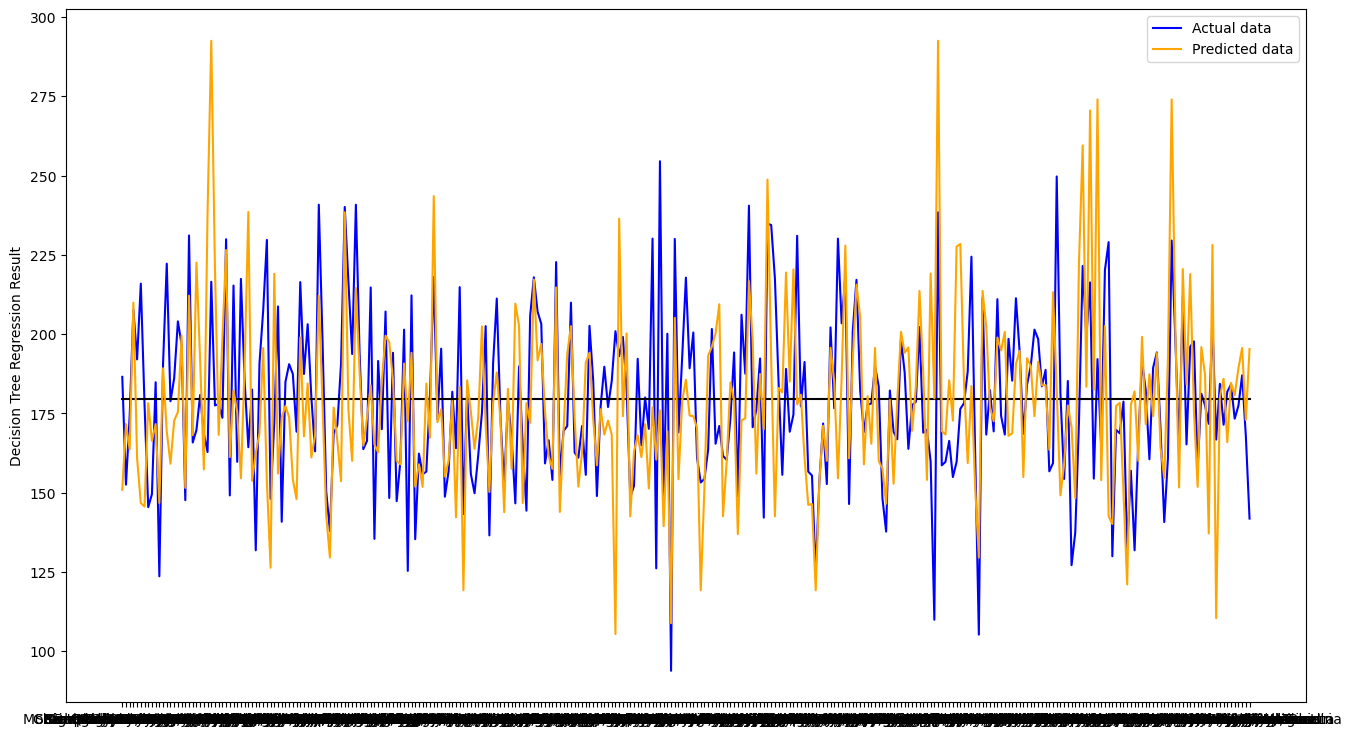

In [29]:
Axis = [y_val.mean()] * len(y_val)
plt.figure(figsize=(16, 9))
plt.ylabel('Decision Tree Regression Result')
plt.plot(y_val, 'blue', label='Actual data')
plt.plot(Axis, color="black")
plt.plot(dtr_pred, 'orange', label='Predicted data')
plt.legend()

# Random Forest Regression

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [30]:
# random forest regression model
from sklearn.ensemble import RandomForestRegressor             

In [31]:
rfr = RandomForestRegressor()

In [32]:
#training the model
rfr_model = rfr.fit(X_train,y_train) 
rfr_pred = rfr_model.predict(X_val)

## Evaluate

In [33]:
#evaluating the model with the following metrics
#mean squared error
rfr_mse=mean_squared_error(rfr_pred, y_val)     
#mean absolute error     
rfr_mae=mean_absolute_error(rfr_pred, y_val)  
#root mean squared error      
rfr_rmse=np.sqrt(mean_squared_error(rfr_pred, y_val))
#r2 score
rfr_r2 = r2_score(rfr_pred, y_val)
print(f'mse: {rfr_mse}')
print(f'mae: {rfr_mae}')
print(f'rmse: {rfr_rmse}')
print(f"r2_score: {rfr_r2}")

mse: 309.1777238622949
mae: 13.341272131147537
rmse: 17.583450283215036
r2_score: 0.23000361829339988


In [34]:
rfr_df =pd.DataFrame({"mse": rfr_mse,"mae": rfr_mae,"rmse": rfr_rmse, "r2": rfr_r2, "deviation": deviation_function(y_val, rfr_pred)},index=['Random Forest Regression'])

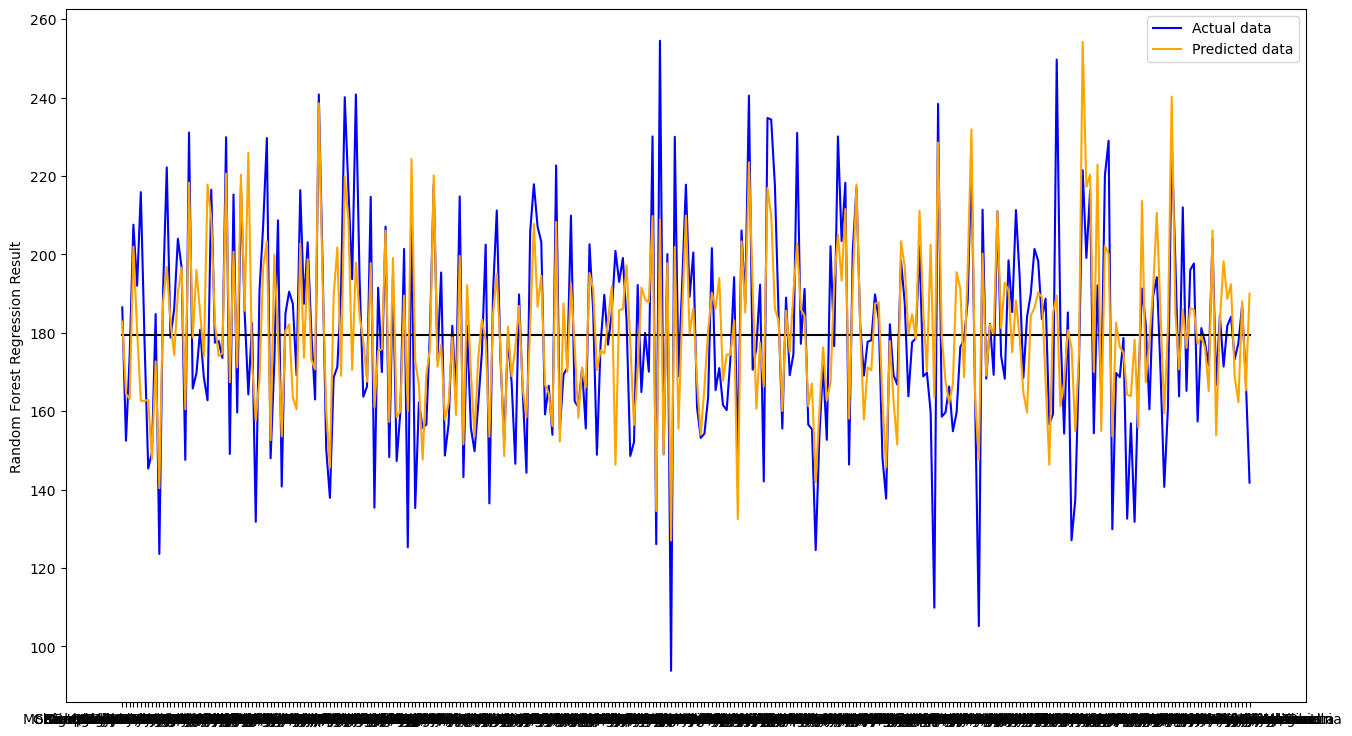

In [35]:
Axis = [y_val.mean()] * len(y_val)
plt.figure(figsize=(16, 9))
plt.ylabel('Random Forest Regression Result')
plt.plot(y_val, 'blue', label='Actual data')
plt.plot(Axis, color="black")
plt.plot(rfr_pred, 'orange', label='Predicted data')
plt.legend()

# XGBoost Regression

https://stackabuse.com/bytes/end-to-end-xgboost-regression-pipeline-with-scikit-learn/

In [36]:
# pip install xgboost

In [37]:
# xgboost model
from xgboost import XGBRegressor            

In [38]:
xgbr = XGBRegressor()

In [39]:
#training the model
xgbr_model = xgbr.fit(X_train,y_train) 
xgbr_pred = xgbr_model.predict(X_val)

## Evaluate

In [40]:
#evaluating the model with the following metrics
#mean squared error
xgbr_mse=mean_squared_error(xgbr_pred, y_val)     
#mean absolute error     
xgbr_mae=mean_absolute_error(xgbr_pred, y_val)  
#root mean squared error      
xgbr_rmse=np.sqrt(mean_squared_error(xgbr_pred, y_val))
#r2 score
xgbr_r2 = r2_score(xgbr_pred, y_val)
print(f'mse: {xgbr_mse}')
print(f'mae: {xgbr_mae}')
print(f'rmse: {xgbr_rmse}')
print(f"r2_score: {xgbr_r2}")

mse: 281.23673063246355
mae: 12.762332008236744
rmse: 16.770114210477622
r2_score: 0.423372627624675


In [41]:
xgbr_df =pd.DataFrame({"mse": xgbr_mse,"mae": xgbr_mae,"rmse": xgbr_rmse,  "r2": xgbr_r2, "deviation": deviation_function(y_val, xgbr_pred)},index=['XGBoost Regression'])

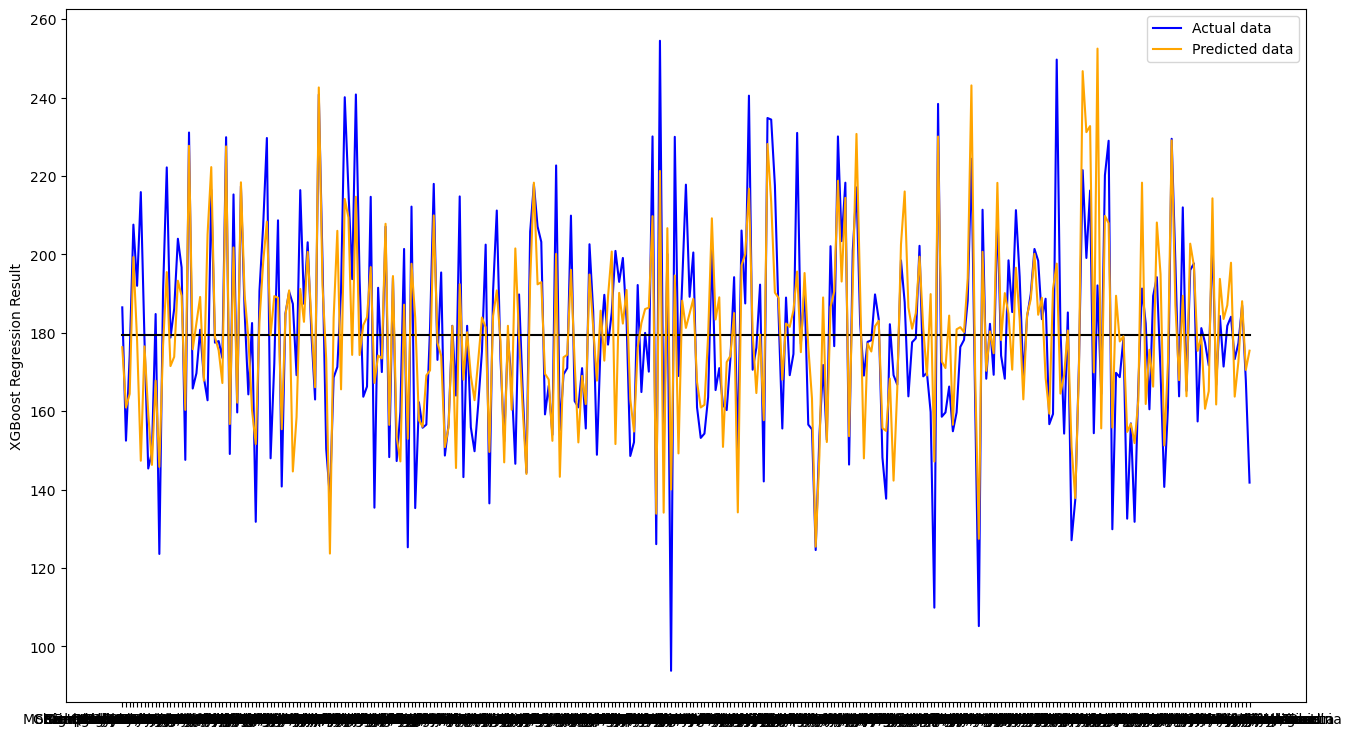

In [42]:
Axis = [y_val.mean()] * len(y_val)
plt.figure(figsize=(16, 9))
plt.ylabel('XGBoost Regression Result')
plt.plot(y_val, 'blue', label='Actual data')
plt.plot(Axis, color="black")
plt.plot(xgbr_pred, 'orange', label='Predicted data')
plt.legend()

# Comparision

https://stats.stackexchange.com/questions/183265/what-does-negative-r-squared-mean#:~:text=It%20means%20you've%20done,least%20squares%20regression%20line%20itself.

https://www.kaggle.com/questions-and-answers/267943

In [43]:
df_evaluation = pd.concat([lr_df, svr_df, dtr_df, rfr_df, xgbr_df]) 
df_evaluation

,mse,mae,rmse,r2,deviation
Linear Regression,321.958409,13.794004,17.943200,0.368003,0.079899
Support Vector Regression,552.588021,18.503919,23.507191,-6.002883,0.107053
Decision Tree Regression,780.892754,20.890820,27.944458,0.009852,0.117253
Random Forest Regression,309.177724,13.341272,17.583450,0.230004,0.077549
XGBoost Regression,281.236731,12.762332,16.770114,0.423373,0.073452


In [44]:
df_evaluation.to_csv("G:/My Drive/DataMining/POC/LungCancer/Evaluation/Raw/basic.csv")

# Save Model

In [45]:
import pickle
lr_filename = 'G:/My Drive/DataMining/POC/LungCancer/local/Model/Raw/lr_Baseline.h5'
pickle.dump(lr_model, open(lr_filename, 'wb'))
svr_filename = 'G:/My Drive/DataMining/POC/LungCancer/local/Model/Raw/svr_Baseline.h5'
pickle.dump(svr_model, open(svr_filename, 'wb'))
rfr_filename = 'G:/My Drive/DataMining/POC/LungCancer/local/Model/Raw/rfr_Baseline.h5'
pickle.dump(rfr_model, open(rfr_filename, 'wb'))
dtr_filename = 'G:/My Drive/DataMining/POC/LungCancer/local/Model/Raw/dtr_Baseline.h5'
pickle.dump(dtr_model, open(dtr_filename, 'wb'))
xgbr_filename = 'G:/My Drive/DataMining/POC/LungCancer/local/Model/Raw/xgbr_Baseline.h5'
pickle.dump(xgbr_model, open(xgbr_filename, 'wb'))